In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

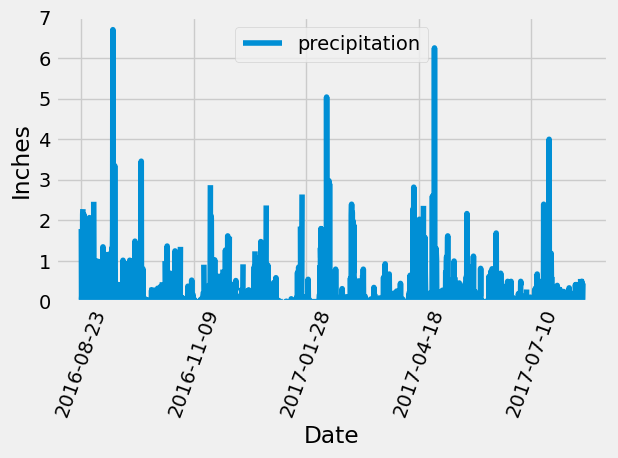

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8, 23) - dt.timedelta(days=365)
query_date

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
results = session.query(*sel).filter(Measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
#prcp_rows = [{"date": result[0], "prcp": result[1]} for result in results]
#prcp_df = pd.DataFrame(prcp_rows).set_index("date")
prcp = [(result.date,result.prcp) for result in results]
prcp_df = pd.DataFrame(prcp, columns=['date', 'precipitation']).set_index("date")
prcp_df

# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values(by = "date")
sorted_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.plot()

plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()


9

In [74]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sation_count = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by (func.count(Measurement.station).desc()).all()
sation_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

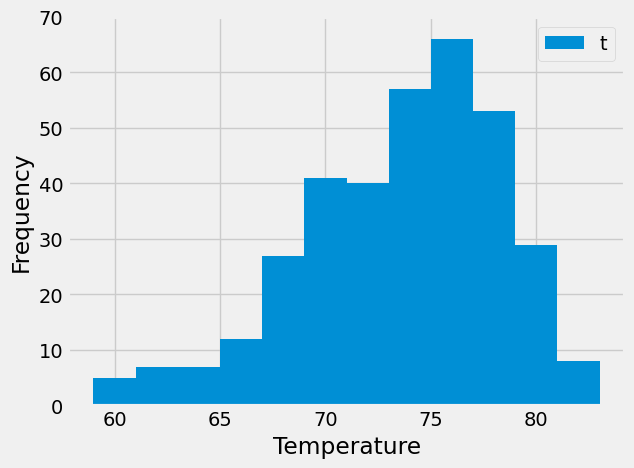

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = dt.date(2017,8, 23) - dt.timedelta(days=365)
query_date

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.tobs]
results = session.query(*sel).filter(Measurement.date >= query_date).filter(Measurement.station == "USC00519281").all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
#prcp_rows = [{"date": result[0], "prcp": result[1]} for result in results]
#prcp_df = pd.DataFrame(prcp_rows).set_index("date")
temp = [(result.date,result.tobs) for result in results]
temp_df = pd.DataFrame(temp, columns=['date', 'temperature']).set_index("date")
temp_df

#temp_counts = temp_df["temperature"].value_counts()
#temp_counts

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(temp_df['temperature'],bins = 12)
plt.legend("tobs")
plt.ylim(0,70)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
#plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()